<a href="https://colab.research.google.com/github/dafeRoy/pytorch_intro/blob/main/simple_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [30]:
# create a model class that inherits nn.Module
class Model(nn.Module):
    # input layer (4 features of the flower) -->
    # hidden layer1 (number of neurons) -->
    # hidden layer2 (number of neurons) -->
    # ouput (3 classes of iris flower)

    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
      super().__init__()
      self.fc1 = nn.Linear(in_features, h1) # fc --> fully connected
      self.fc2 = nn.Linear(h1, h2)
      self.out = nn.Linear(h2, out_features)

    def forward(self, x):
      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.out(x)
      return x

In [31]:
# pick a manual seed for randomization
torch.manual_seed(42)

# create an instance of model
model = Model()

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [33]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [34]:
df["species"] = df["species"].map({"setosa":0, "versicolor":1, "virginica":2})
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [35]:
# train test split
X = df.drop("species", axis=1).values
y = df["species"].values

In [36]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
# convert features and labels to tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [40]:
# set criteria of model to measure error
criterion = nn.CrossEntropyLoss()

# choose optimizer and learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # parameters --> fc1, fc2, out

In [41]:
# train model
# Epochs? --> one run thru all the training data
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train)

  # calculate loss between prediction and ground truth
  loss = criterion(y_pred, y_train)

  # append loss
  losses.append(loss.detach().numpy())

  # print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} Loss: {loss}')

  # do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 Loss: 1.0846847295761108
Epoch: 10 Loss: 0.9183797240257263
Epoch: 20 Loss: 0.7622429728507996
Epoch: 30 Loss: 0.6273833513259888
Epoch: 40 Loss: 0.4667472541332245
Epoch: 50 Loss: 0.28770601749420166
Epoch: 60 Loss: 0.16738919913768768
Epoch: 70 Loss: 0.10598888993263245
Epoch: 80 Loss: 0.0802135244011879
Epoch: 90 Loss: 0.06947019696235657


Text(0.5, 0, 'Epoch')

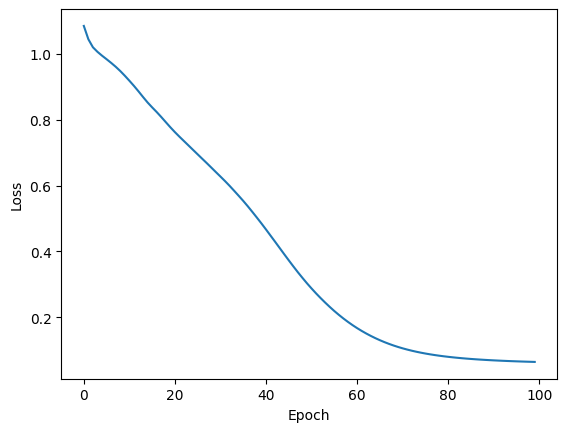

In [42]:
# graph losses
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [43]:
# evaluate model on test data set
with torch.no_grad(): # basically turns off back propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)

In [44]:
loss # this should be close to our train loss

tensor(0.0634)

In [46]:
# to see how our model did, which ones it got right
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    #print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')
    print(f'{i+1}. {str(y_val)} {y_test[i]}')
    if y_val.argmax().item() == y_test[i]:
      correct += 1
  print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

1. tensor([-1.4120,  6.3132,  2.6088]) 1
2. tensor([ 8.4023,  2.4573, -7.5391]) 0
3. tensor([-12.1991,   1.1829,  13.7443]) 2
4. tensor([-1.6752,  5.9271,  2.8622]) 1
5. tensor([-1.5887,  6.7559,  2.8371]) 1
6. tensor([ 7.8451,  2.3289, -7.0010]) 0
7. tensor([ 1.1273,  6.0707, -0.0493]) 1
8. tensor([-5.2088,  4.4484,  6.5316]) 2
9. tensor([-3.2614,  4.9128,  4.4788]) 1
10. tensor([0.5683, 6.5565, 0.5445]) 1
11. tensor([-4.3492,  4.7780,  5.6344]) 2
12. tensor([ 7.3631,  2.0552, -6.5497]) 0
13. tensor([ 8.1384,  2.3552, -7.2879]) 0
14. tensor([ 7.4936,  2.1057, -6.6740]) 0
15. tensor([ 7.8643,  2.2491, -7.0269]) 0
16. tensor([-1.3322,  6.5325,  2.5448]) 1
17. tensor([-8.2712,  2.4244,  9.6406]) 2
18. tensor([0.3374, 6.4826, 0.7657]) 1
19. tensor([-1.5909,  5.7677,  2.7565]) 1
20. tensor([-8.1891,  2.2739,  9.5411]) 2
21. tensor([ 7.2431,  2.0816, -6.4291]) 0
22. tensor([-3.9169,  4.6616,  5.1603]) 2
23. tensor([ 7.3462,  2.2806, -6.5133]) 0
24. tensor([-7.8081,  2.5460,  9.1545]) 2
25. 

In [47]:
new_iris = torch.Tensor([[5.6, 3.7, 2.2, 1.5]]) # list of list because you can be checking several new iris

In [48]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([[ 4.7629,  4.0616, -3.8101]])


In [49]:
# new_iris is species 0 (setosa) since it has the highest tensor

In [50]:
# save nn model
torch.save(model.state_dict(), 'iris_model.pt')

In [51]:
# load nn model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [53]:
# making sure it loaded correctly
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)